In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, Ellipse

In [2]:
fs = 0.02
Nfft = 2**10
N = 100 * Nfft
nsyms = int(np.ceil(N * 3 * fs))
syms = 2 * np.random.randint(0, 2, size = nsyms) - 1

fsc = 0.08
z = syms[np.int32(np.arange(N) * fs)] * np.sign(np.sin(2 * np.pi * fsc * np.arange(N)))
z_b = syms[np.int32(np.arange(N) * fs * 3)]
z_m = syms[np.int32(np.arange(N) * fs * 2)] * (-1)**(np.int32(np.arange(N) * fs * 4))

dev = 1
x = np.exp(1j * dev * z)
x_b = np.exp(1j * dev * z_b)
x_m = np.exp(1j * dev * z_m)

f = 20*np.log10(np.fft.fftshift(np.average(np.abs(np.fft.fft(x.reshape((-1,Nfft))))**2, axis = 0)))
f_b = 20*np.log10(np.fft.fftshift(np.average(np.abs(np.fft.fft(x_b.reshape((-1,Nfft))))**2, axis = 0)))
f_m = 20*np.log10(np.fft.fftshift(np.average(np.abs(np.fft.fft(x_m.reshape((-1,Nfft))))**2, axis = 0)))

In [3]:
def plot(f, title, file):
    with plt.xkcd():
        a = 180
        sel = slice(f.size//2-a, f.size//2+a)
        plt.figure()
        plt.plot(f[sel])
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
        plt.savefig(file, dpi = 300)

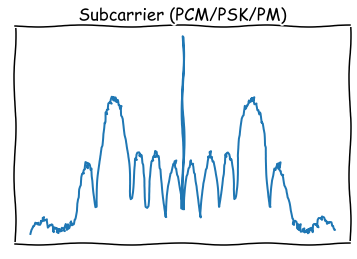

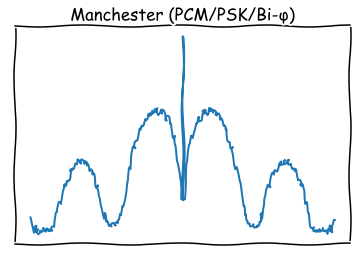

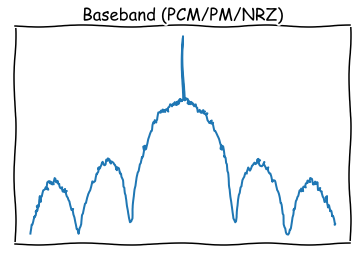

In [4]:
plot(f, 'Subcarrier (PCM/PSK/PM)', 'subcarrier.png')
plot(f_m, 'Manchester (PCM/PSK/Bi-φ)', 'manchester.png')
plot(f_b, 'Baseband (PCM/PM/NRZ)', 'baseband.png')

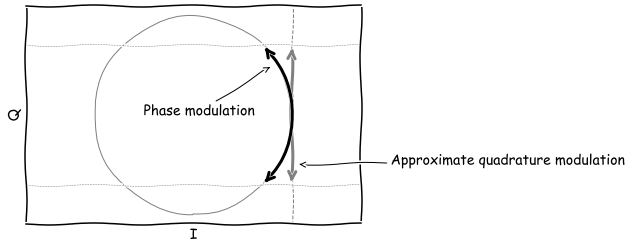

In [17]:
with plt.xkcd():
    circle = Circle((0,0), 1, fill = False, ec = 'grey')
    theta0 = -np.pi/4
    theta1 = np.pi/4
    arrows = FancyArrowPatch((np.cos(theta0),np.sin(theta0)),
                             (np.cos(theta1),np.sin(theta1)),
                             lw = 3,
                             arrowstyle = "<->, head_width=4, head_length=8",
                             connectionstyle="arc3,rad=0.42",
                             zorder = 30)
    arrows2 = FancyArrowPatch((1, np.sin(theta0)),
                             (1, np.sin(theta1)),
                             lw = 3,
                             color = 'gray',
                             arrowstyle = "<->, head_width=4, head_length=8",
                             zorder = 20)
    plt.figure()
    plt.annotate('Phase modulation', (0.8,0.5), (-0.5,0.0), arrowprops=dict(arrowstyle="->"))
    plt.annotate('Approximate quadrature modulation', (1.05,-0.5), (2,-0.5), arrowprops=dict(arrowstyle="->"))
    plt.axvline(x = 1, linestyle = '--', lw = 1, color = 'gray')
    plt.axhline(y = np.sin(theta0), linestyle = '--', lw = 0.5, color = 'gray')
    plt.axhline(y = np.sin(theta1), linestyle = '--', lw = 0.5, color = 'gray')
    plt.gca().add_patch(circle)
    plt.gca().add_patch(arrows)
    plt.gca().add_patch(arrows2)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('I')
    plt.ylabel('Q')
    plt.savefig('iq.png', bbox_inches = 'tight', dpi = 300)

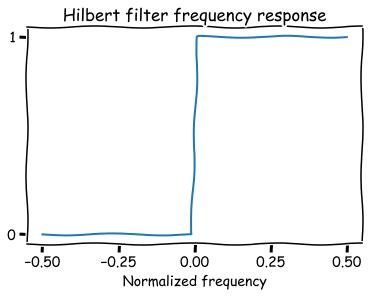

In [6]:
with plt.xkcd():
    f = np.linspace(-0.5, 0.5)
    hilb = np.zeros(f.size)
    hilb[f > 0] = 1
    plt.plot(f, hilb)
    plt.title('Hilbert filter frequency response')
    plt.xlabel('Normalized frequency')
    plt.xticks(np.arange(-0.5,0.51, 0.25))
    plt.yticks([0,1])
    plt.savefig('hilbert.png', bbox_inches = 'tight', dpi = 300)

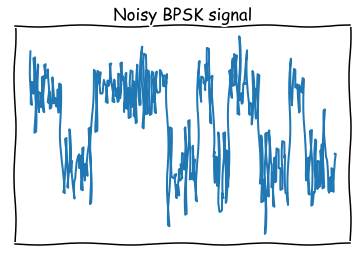

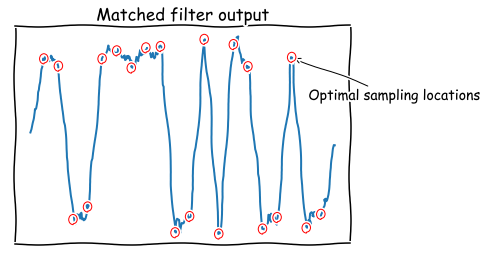

In [7]:
k = 16
np.random.seed(1)
x = 2*np.repeat(np.random.randint(0, 2, size = 20), k)-1
n = 0.5 * np.random.randn(x.size)
x = x + n
y = np.convolve(x, np.ones(k)/k)
s = np.arange(15,y.size,k)
with plt.xkcd():
    plt.figure()
    plt.plot(x)
    plt.title('Noisy BPSK signal')
    plt.xticks([])
    plt.yticks([])
    plt.savefig('pre_matched.png', bbox_inches = 'tight', dpi = 300)
    plt.figure()
    plt.plot(y)
    for ss in s:
        plt.gca().add_patch(Ellipse((ss,y[ss]), 8, 0.1, fill = False, ec = 'red', zorder = 20))
    plt.annotate('Optimal sampling locations', (s[-3],y[s[-3]]), (y.size-30,0.5), arrowprops=dict(arrowstyle="->"))
    plt.title('Matched filter output')
    plt.xticks([])
    plt.yticks([])
    plt.savefig('post_matched.png', bbox_inches = 'tight', dpi = 300)

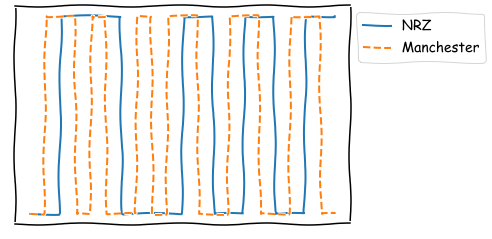

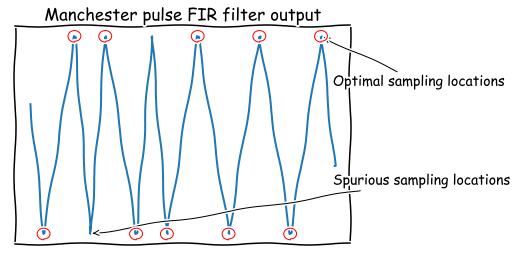

In [8]:
k = 16
np.random.seed(2)
syms = 2*np.random.randint(0, 2, size = 10)-1
x = np.repeat(syms, k)
mpulse = np.repeat([1,-1], k//2)
mpulses = np.tile(mpulse, syms.size)
xm = x * mpulses
ym = np.convolve(xm, mpulse[::-1]/np.sum(np.abs(mpulse)))
sm = np.arange(mpulse.size-1,ym.size,k)
with plt.xkcd():
    plt.figure()
    plt.plot(x)
    plt.plot(xm, '--')
    plt.legend(['NRZ', 'Manchester'], bbox_to_anchor=(1, 1))
    plt.xticks([])
    plt.yticks([])
    plt.savefig('manchester_wave.png', bbox_inches = 'tight', dpi = 300)
    
    plt.figure()
    plt.plot(np.arange(ym.size)[mpulse.size//2:-mpulse.size//2], ym[mpulse.size//2:-mpulse.size//2])
    for ss in sm:
        plt.gca().add_patch(Ellipse((ss,ym[ss]), 6, 0.1, fill = False, ec = 'red', zorder = 20))
    plt.annotate('Optimal sampling locations', (sm[-1],ym[sm[-1]]), (ym.size-10,0.5), arrowprops=dict(arrowstyle="->"))
    plt.annotate('Spurious sampling locations', ((sm[1]+sm[2])//2,ym[(sm[1]+sm[2])//2]), (ym.size-10,-0.5), arrowprops=dict(arrowstyle="->"))
    plt.xticks([])
    plt.yticks([])
    plt.title('Manchester pulse FIR filter output')
    plt.savefig('manchester_fir.png', bbox_inches = 'tight', dpi = 300)